# Read Daily Incidence Cases and WW concentration For UTAH's wwtp
#Data from NWSS
#Author: Imelda Trejo
#Last update: Nov, 09, 2022
#Objective: extract and plot the raw data

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import datetime
from matplotlib import cm

In [2]:
plt.rcParams.update({'font.size':16})
colors = cm.plasma(np.linspace(0,1,12))


#baseURL="C:/Users/Imelda/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/CCM_UNAM/Research/Salud_publica/MX_COVID_2025/data/covidHidalgo.csv"

baseURL="C:/Users/Imelda Trejo/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/CCM_UNAM/Research/Salud_publica/MX_COVID_2025/data/covid_data.csv"

#   
myData=pd.read_csv(baseURL,skipinitialspace=True)
print(myData.head(10))

#Stratify the data by key_plot (smaller resolution than wwtp)
key_plot=np.array(myData.get(['State'])).ravel()


   Cases        Date  Number_state  Population  Rate_cases  Smooth_cases  \
0      0  2020-02-26             1     1434635         0.0      0.000592   
1      0  2020-02-27             1     1434635         0.0      0.001039   
2      0  2020-02-28             1     1434635         0.0      0.001802   
3      0  2020-02-29             1     1434635         0.0      0.003084   
4      0  2020-03-01             1     1434635         0.0      0.005201   
5      0  2020-03-02             1     1434635         0.0      0.008626   
6      0  2020-03-03             1     1434635         0.0      0.014049   
7      0  2020-03-04             1     1434635         0.0      0.022436   
8      0  2020-03-05             1     1434635         0.0      0.035088   
9      0  2020-03-06             1     1434635         0.0      0.053683   

            State  
0  AGUASCALIENTES  
1  AGUASCALIENTES  
2  AGUASCALIENTES  
3  AGUASCALIENTES  
4  AGUASCALIENTES  
5  AGUASCALIENTES  
6  AGUASCALIENTES  
7  

In [3]:
key_plot

array(['AGUASCALIENTES', 'AGUASCALIENTES', 'AGUASCALIENTES', ...,
       'ZACATECAS', 'ZACATECAS', 'ZACATECAS'], dtype=object)

In [4]:
#---------------------Define initial date for the analysis
#----date index: 1st case accrss all jurisdiction
#----From date index, we define the time series with index range(0,n)

dateIndex=np.unique(myData.get(['Date']))  #ordered
allDates=len(dateIndex)
print('total observed days: n=', allDates)

#transaform the data into date type
newDateIndex=np.array(dateIndex).ravel()
for k in range(0,allDates):
    a= np.datetime64(dateIndex[k])
    a= a.astype(datetime.datetime)
    newDateIndex[k]=a.strftime('%b-%d-%y')

#tend=np.where(newDateIndex=="Nov-04-22")[0][0] 
#tend=newDateIndex[allDates-1]
#cleanDateIndex=newDateIndex[0:tend+1]
#n=len(cleanDateIndex)
#np.save("dateIndex.npy",cleanDateIndex)

n=len(newDateIndex)

np.save("dateIndex.npy",newDateIndex)


print(newDateIndex[-10:])



total observed days: n= 1021
['Dec-03-22' 'Dec-04-22' 'Dec-05-22' 'Dec-06-22' 'Dec-07-22' 'Dec-08-22'
 'Dec-09-22' 'Dec-10-22' 'Dec-11-22' 'Dec-12-22']


In [5]:
def ReadData(ToSelect,n):
    
    Y,SmoothY=np.zeros(n),np.zeros(n)

    myNewData=myData.loc[myData["State"]==ToSelect] #select wwtp
    
    Tinit=np.array(myNewData.get(['Date'])).ravel()[0]
    
    init=np.where(dateIndex==Tinit)[0][0] #1st report
    
    #Yaux=np.array(myNewData.get(['Cases'])).ravel()
    Yaux=np.array(myNewData.get(['Smooth_cases'])).ravel()
    
    
    # replace nan with zeros
    Yaux[np.isnan(Yaux)] = 0
    
    Y[init:]=Yaux[0:(n-init)]   #start from its 1st reported cases
    
    for k in range(0,n): #clean data
        if Y[k]<0:
            Y[k]=0       
         
    return Y 

In [8]:
#plot the two time series
TT=np.linspace(0,n,n)
#print(len(TT),n)

state_name=["BAJA_CALIFORNIA", "BAJA_CALIFORNIA_SUR", "SONORA", "CHIHUAHUA",
             "COAHUILA", "NUEVO_LEON", "TAMAULIPAS", "SINALOA", "DURANGO",
             "ZACATECAS", "SAN_LUIS_POTOSI", "AGUASCALIENTES", "NAYARIT",
             "JALISCO", "COLIMA", "GUANAJUATO", "QUERETARO", "HIDALGO", "MEXICO",
             "DISTRITO_FEDERAL", "MICHOACAN", "MORELOS", "TLAXCALA", "PUEBLA", 
             "VERACRUZ", "GUERRERO", "OAXACA", "TABASCO", "CHIAPAS", "CAMPECHE",
             "YUCATAN", "QUINTANA_ROO"]


for i in range(0,len(state_name)):
    print(state_name[i])
    Yaux =ReadData(state_name[i],n)
    #-------Save average data -----
    np.save(state_name[i]+".npy",Yaux)



BAJA_CALIFORNIA
BAJA_CALIFORNIA_SUR
SONORA
CHIHUAHUA
COAHUILA
NUEVO_LEON
TAMAULIPAS
SINALOA
DURANGO
ZACATECAS
SAN_LUIS_POTOSI
AGUASCALIENTES
NAYARIT
JALISCO
COLIMA
GUANAJUATO
QUERETARO
HIDALGO
MEXICO
DISTRITO_FEDERAL
MICHOACAN
MORELOS
TLAXCALA
PUEBLA
VERACRUZ
GUERRERO
OAXACA
TABASCO
CHIAPAS
CAMPECHE
YUCATAN
QUINTANA_ROO


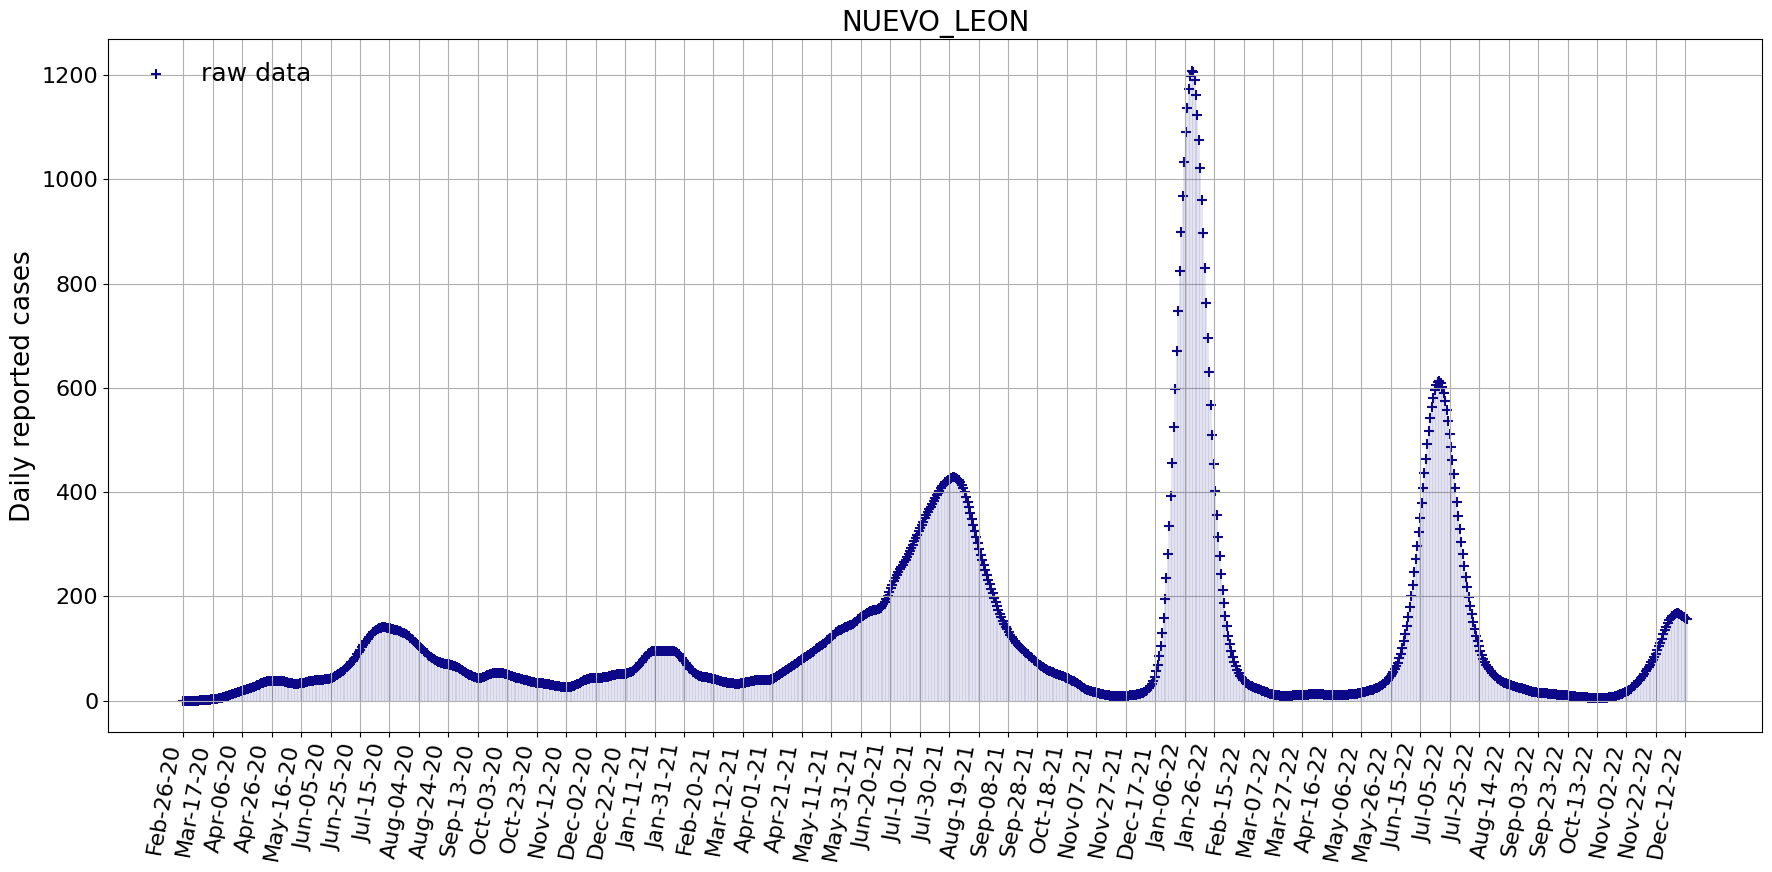

In [11]:
#top panel cases plot
#-------Plot raw data -----
key=5 
fig, ax = plt.subplots(figsize=(18,9))

ax.scatter(TT,Yaux, 60, marker='+', color = colors[0], label='raw data')
ax.vlines(TT,0,Yaux,color =colors[0],alpha=.1)
ax.set_ylabel('Daily reported cases',fontsize=19)
ax.set_title(state_name[key],fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=18) 
ax.set_xticks(range(0,n,20))
ax.set_xticklabels(newDateIndex[::20], rotation=45)
#ax[0].set_ylim(0,4000)
ax.tick_params(labelsize=10)
ax.grid(axis='x')
ax.grid(axis='y')
fig.autofmt_xdate()
   
#plt.xlabel('Time (month-day-year)',fontsize=18)
plt.tick_params(labelsize=16)
ax.set_xticklabels(newDateIndex[::20], rotation=80)
#fig.autofmt_xdate()
fig.tight_layout()
#fig.savefig('%s.pdf' % ID[key])


In [8]:
#number_wwtp=5

#for i in range(0,number_wwtp):
#    Yaux, Waux =ReadData(key_plot[i],allDates)   
    #-------Save average data -----
#    np.save("%sY.npy" %key_plot[i],Yaux)
#    np.save("%sW.npy" %key_plot[i],Waux)
   


In [9]:
Yaux

array([1.27027209e-02, 2.04850123e-02, 3.26196842e-02, ...,
       4.32688896e+01, 4.42360531e+01, 4.50790708e+01])

In [10]:
key_plot[25:]

array(['AGUASCALIENTES', 'AGUASCALIENTES', 'AGUASCALIENTES', ...,
       'ZACATECAS', 'ZACATECAS', 'ZACATECAS'], dtype=object)